<a href="https://colab.research.google.com/github/guillermohenrion/Courses-ML-AI/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AdaBoost: Introducción y Ejemplo Práctico

## 1. Introducción a AdaBoost

AdaBoost, que significa "Adaptive Boosting", es un algoritmo de ensamblado que se utiliza principalmente para la clasificación. Fue propuesto por Freund y Schapire en 1995. AdaBoost combina múltiples clasificadores débiles para formar un clasificador fuerte.

### ¿Por qué AdaBoost?

1. **Mejora del rendimiento:** Aumenta la precisión de los modelos débiles.
2. **Pesado adaptativo:** Ajusta los pesos de las muestras y clasificadores en cada iteración para enfocarse en los errores difíciles de clasificar.
3. **Simplicidad:** Utiliza un enfoque simple pero efectivo para mejorar los modelos base.

## 2. Conceptos Clave

### Clasificador Débil

Un clasificador débil es un modelo de baja complejidad que tiene un rendimiento ligeramente mejor que el azar. En AdaBoost, los clasificadores débiles se suelen representar por árboles de decisión con una sola división (stumps).

### Ensamblado Adaptativo

AdaBoost asigna pesos a las muestras y ajusta estos pesos iterativamente. Las muestras que son clasificadas incorrectamente reciben mayores pesos para que los clasificadores débiles posteriores se centren en ellas.

### Hiperparámetros Importantes

1. `n_estimators`: Número de clasificadores débiles a combinar.
2. `learning_rate`: Tasa de aprendizaje que reduce la contribución de cada clasificador débil.

## 3. Ejemplo Práctico

Vamos a ilustrar el uso de AdaBoost con un ejemplo práctico utilizando el conjunto de datos Iris.



In [1]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.plotting import plot_decision_regions

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data[:, :2]  # Usaremos solo las dos primeras características para facilitar la visualización
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar un árbol de decisión como clasificador débil
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf.fit(X_train, y_train)

# Crear y entrenar un AdaBoost
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0, random_state=42)
ada_clf.fit(X_train, y_train)

# Evaluar los modelos
tree_accuracy = tree_clf.score(X_test, y_test)
ada_accuracy = ada_clf.score(X_test, y_test)
print(f'Exactitud del Árbol de Decisión: {tree_accuracy:.2f}')
print(f'Exactitud del AdaBoost: {ada_accuracy:.2f}')


Exactitud del Árbol de Decisión: 0.64
Exactitud del AdaBoost: 0.73


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


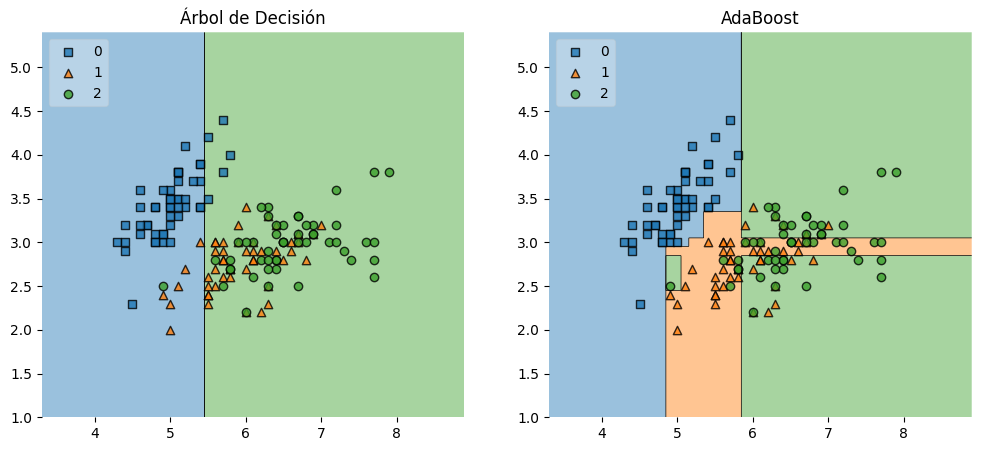

In [2]:
# Definir el tamaño de la figura
plt.figure(figsize=(12, 5))

# Árbol de Decisión
plt.subplot(1, 2, 1)
plot_decision_regions(X, y, clf=tree_clf, legend=2)
plt.title('Árbol de Decisión')

# AdaBoost
plt.subplot(1, 2, 2)
plot_decision_regions(X, y, clf=ada_clf, legend=2)
plt.title('AdaBoost')

plt.show()
